# STEP 0: Set up

To get started on this notebook, you’ll need to restore any variables
from previous notebooks to your workspace. To save time and memory, make
sure to specify which variables you want to load.

In [7]:
%store -r

You will also need to import any libraries you are using in this
notebook, since they won’t carry over from the previous notebook:

In [3]:
# Import libraries

### working with rasters
import xarray as xr
import rioxarray as rxr

### plotting
import matplotlib.pyplot as plt

### interactive plotting with rasters
import hvplot.xarray

### interactive plotting with vectors
import hvplot.pandas

### Simple plotting

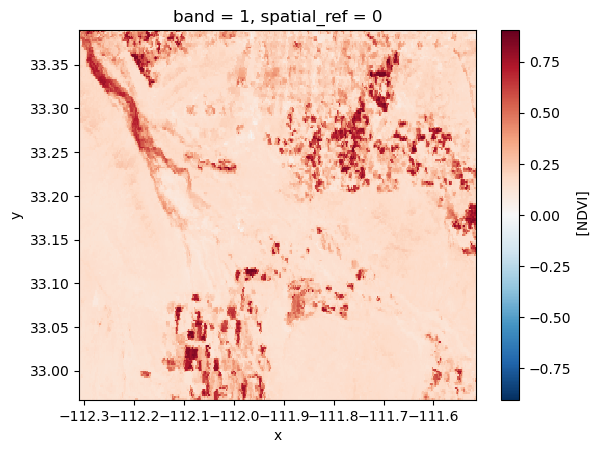

In [8]:
### plot the first tif image
### squeeze removes extra dimensions
rxr.open_rasterio(ndvi_paths[0], mask_and_scale = True).squeeze().plot()

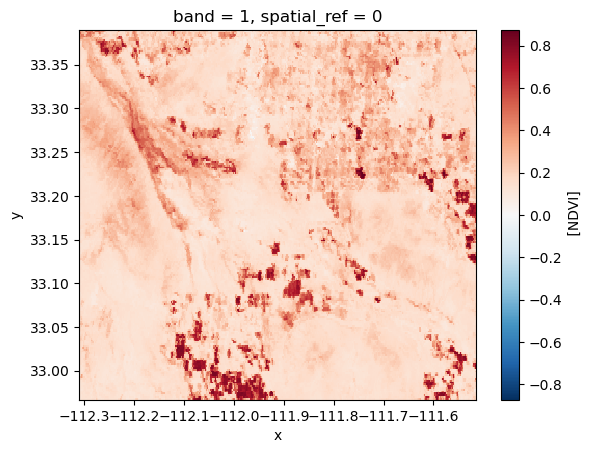

In [9]:
### plot the last tif image (use [-1] to get the last object in the list)
### squeeze removes extra dimensions
rxr.open_rasterio(ndvi_paths[-1], mask_and_scale = True).squeeze().plot()

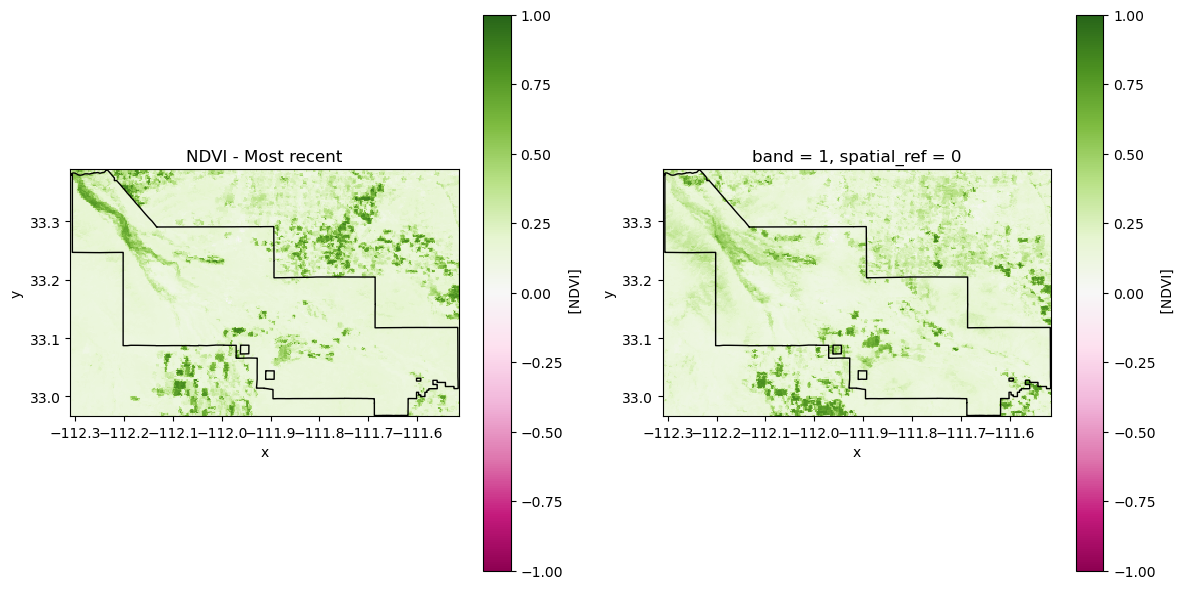

In [16]:
### plot them side by side
ndvi_first = rxr.open_rasterio(ndvi_paths[0], mask_and_scale = True).squeeze()
ndvi_last = rxr.open_rasterio(ndvi_paths[-1], mask_and_scale = True).squeeze()

### make side by side subplots
### 1 subplot with 1 row + 2 columns
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

### plot first ndvi with gila river boundary
ndvi_first.plot(ax=axes[0], cmap=plt.cm.PiYG, vmin=-1, vmax=1)
gila_gdf.plot(ax=axes[0], edgecolor='black', facecolor='none', linewidth=1)
axes[0].set_title("NDVI - Earliest")

### plot last ndvi with gila river boundary
ndvi_last.plot(ax=axes[1], cmap=plt.cm.PiYG, vmin=-1, vmax=1)
gila_gdf.plot(ax=axes[1], edgecolor='black', facecolor='none', linewidth=1)
axes[0].set_title("NDVI - Most recent")

### play with layout
plt.tight_layout()
plt.show()

# STEP 3: Plot NDVI

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-task"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Try It: Plot the change in NDVI spatially</div></div><div class="callout-body-container callout-body"><p>Complete the following:</p>
<ul>
<li>Select data from 2021 to 2023 (3 years after the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="1"></span>)</li>
<li>Take the temporal mean (over the <strong>date</strong>, not
spatially)</li>
<li>Get the NDVI variable (should be a DataArray, not a Dataset)</li>
<li>Repeat for the data from 2018 to 2020 (3 years before the <span
data-__quarto_custom="true" data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="2"></span>)</li>
<li>Subtract the 2018-2020 time period <strong>from</strong> the
2021-2023 time period</li>
<li>Plot the result using a <strong>diverging</strong> color map like
<code>cmap=plt.cm.PiYG</code></li>
</ul>
<p>There are different types of color maps for different types of data.
In this case, we want decreases to be a different color from increases,
so we should use a <strong>diverging</strong> color map. Check out
available colormaps in the <a
href="https://matplotlib.org/stable/tutorials/colors/colormaps.html">matplotlib
documentation</a>.</p></div></div>

<link rel="stylesheet" type="text/css" href="./assets/styles.css"><div class="callout callout-style-default callout-titled callout-extra"><div class="callout-header"><div class="callout-icon-container"><i class="callout-icon"></i></div><div class="callout-title-container flex-fill">Looking for an Extra Challenge?</div></div><div class="callout-body-container callout-body"><p>For an extra challenge, add the <span data-__quarto_custom="true"
data-__quarto_custom_type="Shortcode"
data-__quarto_custom_context="Inline"
data-__quarto_custom_id="3"></span> boundary to the plot.</p></div></div>

In [ ]:
# Compute the difference in NDVI before and after return of water rights in 2004
### use .sel to select years to use
# ndvi_diff = (
    
#     ### slice the dates to most recent time period
#     ndvi_da.sel(date = slice('2012', '2022'))

#     get mean NDVIvalue for that time span
#     .mean('date').NDVI
    
#     ### subtract mean NDVI from the first part of the time series
#     - ndvi_da.sel(date = slice('2001', '2011')).mean('date').NDVI)


ndvi_diff = (
    ndvi_da

        ### use .sel to select years to use for end of time series
        .sel(date=slice('2012', '2022'))

        ### get mean NDVI for that time period
        .mean('date')
        .NDVI 
    - ndvi_da

        ### use .sel to select years to use for beginning of time series
        .sel(date=slice('2001', '2011'))

        ### get mean NDVI for that time period
        .mean('date')
        .NDVI
)

ndvi_diff

<xarray.DataArray 'NDVI' (y: 203, x: 382)> Size: 310kB
array([[-0.05567682, -0.0292117 ,  0.00586349, ...,  0.01543377,
         0.01543377,  0.00927271],
       [-0.07940263, -0.03390124, -0.02959213, ...,  0.01815718,
         0.01815718,  0.0177182 ],
       [-0.17723629, -0.08530393,  0.01360923, ...,  0.01517531,
         0.00823637,  0.01195324],
       ...,
       [-0.0115844 , -0.0115844 , -0.00991558, ..., -0.00157142,
        -0.00157142,  0.00205326],
       [-0.01115062, -0.01115062, -0.00994415, ...,  0.00598571,
         0.00598571, -0.00095583],
       [-0.00930774, -0.00849222, -0.01209998, ..., -0.0296714 ,
        -0.02090381, -0.03258313]], shape=(203, 382), dtype=float32)
Coordinates:
    band         int64 8B 1
  * x            (x) float64 3kB -112.3 -112.3 -112.3 ... -111.5 -111.5 -111.5
  * y            (y) float64 2kB 33.39 33.39 33.38 33.38 ... 32.97 32.97 32.97
    spatial_ref  int64 8B 0

In [21]:
# Plot the difference
(
    ndvi_diff.hvplot(x='x', y='y', cmap='PiYG', geo=True,
                     title = "NDVI changes in Gila River Indian Community\nfrom 2001-2011 to 2012-2022")
    *
    gila_gdf.hvplot(geo=True, fill_color=None, line_color='black')
)

:Overlay
   .Image.I    :Image   [x,y]   (NDVI)
   .Polygons.I :Polygons   [Longitude,Latitude]

# STEP -1: Wrap up

Don’t forget to store your variables so you can use them in other
notebooks! Replace `var1` and `var2` with the variable you want to save,
separated by spaces.

In [22]:
%store ndvi_diff

Stored 'ndvi_diff' (DataArray)


Finally, be sure to `Restart` and `Run all` to make sure your notebook
works all the way through!